In [25]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import yfinance as yf

In [38]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-11-06,21285.056641,21345.376953,20920.191406,20926.486328,20926.486328,35082693210
2022-11-07,20924.621094,21053.246094,20489.972656,20602.816406,20602.816406,53510852236
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
# df = pd.DataFrame(index=range(0,2000,1))
# df = df.iloc[1100:]

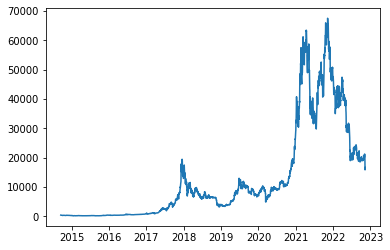

In [41]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [42]:
#splitting into train and test
to_row = int(len(df)*0.5)
train_data = list(df[0:to_row]['Adj Close'])
test_data = list(df[to_row:]['Adj Close'])
#train_data
# test_data

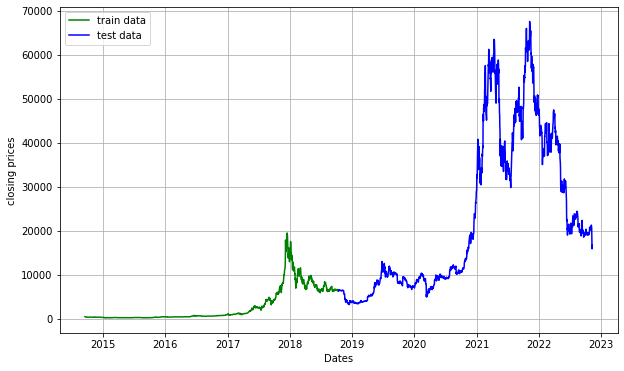

In [43]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('closing prices')
plt.plot(df[0:to_row]['Adj Close'],'green', label = 'train data')
plt.plot(df[to_row:]['Adj Close'],'blue', label = 'test data')
plt.legend()

In [44]:
model_predictions = []
n_test_observations = len(test_data)

In [36]:
print(n_test_observations)

298


In [47]:
print(len(train_data))

1488


In [46]:
for i in range(n_test_observations):
  model = ARIMA(train_data, order = (4, 1, 1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_val = test_data[i]

  train_data.append(actual_test_val)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
print(len(test_data))
print(len(model_predictions))
print(len(train_data))

In [ ]:
model_fit.summary()

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df.tail(289).index

plt.plot(date_range, model_predictions[-289:], color = 'green', marker='^', linestyle = 'dashed', label = 'BTC predicted price')
plt.plot(date_range, test_data[-289:], color = 'blue', label = 'BTC actual price')

plt.title('btc price prediction')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
mape = np.mean(np.abs(np.array(model_predictions[-289:]) - np.array(test_data[-289:]))/np.abs(test_data[-289:]))
print(mape) #mean absolute percentage error
# print(r2_score(model_predictions, test_data))
# print(mean_absolute_error(model_predictions, test_data))